In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("sample_sales_data.csv")

In [ ]:
df.head()

,Date,SalesAmount,ProductCategory
0,2024-06-05,806.81,Home & Garden
1,2024-08-26,7749.31,Books
2,2024-06-13,5128.34,Clothing
3,2024-12-16,1902.23,Clothing
4,2024-05-23,5511.11,Clothing


In [ ]:
df.describe(include='all')

,Date,SalesAmount,ProductCategory
count,100,100.000000,100
unique,92,NaN,4
top,2024-07-02,NaN,Clothing
freq,2,NaN,34
mean,NaN,5418.983800,NaN
std,NaN,2842.101604,NaN
min,NaN,201.920000,NaN
25%,NaN,3265.900000,NaN
50%,NaN,5408.795000,NaN
75%,NaN,7743.077500,NaN


In [ ]:
df.nunique()

Date                92
SalesAmount        100
ProductCategory      4
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isna().sum()

Date               0
SalesAmount        0
ProductCategory    0
dtype: int64

In [ ]:
from matplotlib import pyplot as plt
_df_0['SalesAmount'].plot(kind='hist', bins=20, title='SalesAmount')
plt.gca().spines[['top', 'right',]].set_visible(False)

NameError: name '_df_0' is not defined

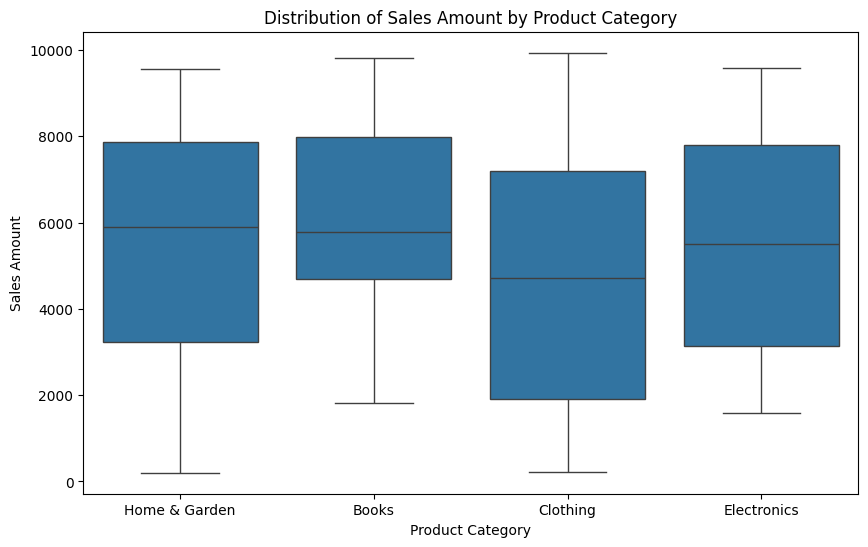

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='ProductCategory', y='SalesAmount', data=df)
plt.title('Distribution of Sales Amount by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Sales Amount')
plt.show()

In [ ]:

skewness = df.skew()
print("Skewness for each column:")
print(skewness)

def distribution_type(skew):
    if skew > 0.5:
        return "Right-skewed"
    elif skew < -0.5:
        return "Left-skewed"
    elif skew >= -0.5 and skew <= 0.5:
        return "Approximately symmetric"
    else:
        return "Unknown"
for column, skew in skewness.items():
    print(f"Column: {column}")
    print(f"Skewness: {skew}")
    print(f"Distribution Type: {distribution_type(skew)}")
    print()

Skewness for each column:
SalesAmount   -0.197557
dtype: float64
Column: SalesAmount
Skewness: -0.197557265852842
Distribution Type: Approximately symmetric



<ipython-input-18-047bf076403e>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  skewness = df.skew()


The columns are approximately symmetric which means the data is normally distributed


In [ ]:
#Hypothesis testing

In [ ]:
from scipy.stats import f_oneway

# Perform ANOVA testing
anova_result = f_oneway(*[df[df['ProductCategory'] == category]['SalesAmount'] for category in df['ProductCategory'].unique()])

# Print ANOVA result
print("ANOVA Result:")
print(anova_result)
print()

if anova_result.pvalue < 0.05:
    print("There is a significant difference in sales amount across different product categories.")
else:
    print("There is no significant difference in sales amount across different product categories.")

ANOVA Result:
F_onewayResult(statistic=1.1796719056950664, pvalue=0.3216306495885336)

There is no significant difference in sales amount across different product categories.


In [ ]:
#There is no differnce according to sales relation to the product
# therefore there is no relation between the samples

In [ ]:
#let's perform chi-square testing to determine if there is an association between date and sales amount

In [ ]:
from scipy.stats import chi2_contingency
df['Date'] = pd.to_datetime(df['Date'])


df['Month'] = df['Date'].dt.month

date_sales_table = pd.crosstab(df['Month'], pd.cut(df['SalesAmount'], bins=3))

chi2, p, _, _ = chi2_contingency(date_sales_table)

print("Chi-Square Test Result:")
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")
print()


if p < 0.05:
    print("There is an association between date (month) and sales amount.")
else:
    print("There is no association between date (month) and sales amount.")

Chi-Square Test Result:
Chi-Square Statistic: 30.81428036983593
P-value: 0.09997889568885113

There is no association between date (month) and sales amount.


In [ ]:
#There is no association between date and sales amount

From the hypothesis testing using various test it is clear that each sample are independent from other sample
